# SECOND EXPERIMENTATION - FIRST ASSUMPTION, WITH SOME LABELING CORRECTIONS

# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets - Modificados según resultados.csv', sep = ',')

In [6]:
tweets_df.shape

(296, 2)

In [7]:
tweets_df.head()

,full_text,sentiment
0,@Nata_Salud @Sandrag69 @AndresMejiaV ¡Hola Natalia! Te invitamos a descubrir tu #MatchPresidencial aquí: https://t.co/0E1tZKypTK,neutral
1,@supershadai @Registraduria Quien o que institución en Colombia atiende los reclamos al fraude electoral?\n Porque no suspender a al registrador que ya la defeco en las elecciones de senado y camara.\n Hay una desconfianza general en cuanto a las presidenciales.\n Están provocando una respuesta violenta.,negative
2,@BOLIBAR2 @AndresPastrana_ @santiagoangelp Un poco tarde con las elecciones encima… mal para Colombia,negative
3,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive
4,"@BOLIBAR2 @CNE_COLOMBIA @AndresPastrana_ Aquí no va a pasar nada, y petro de va a robar las elecciones presidenciales y el país",negative


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.679054
neutral     0.256757
positive    0.064189
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [9]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(296, 2)

In [11]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_unlabeled_df.shape

(0, 2)

In [13]:
# Scenario 1: Working with all classes
tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment']

### Splitting train and test datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [15]:
X_train.shape

(236,)

In [16]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.677966
neutral     0.258475
positive    0.063559
Name: sentiment, dtype: float64

In [17]:
X_test.shape

(60,)

In [18]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.683333
neutral     0.250000
positive    0.066667
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [19]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
X_bow = bow.fit_transform(X_train)

In [22]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [25]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

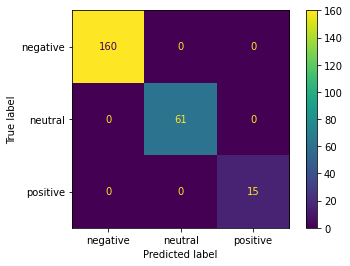

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

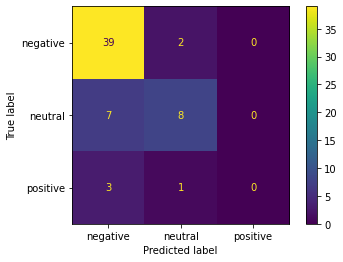

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [28]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.79591837 0.72727273 0.        ]
Recall: [0.95121951 0.53333333 0.        ]
F1: [0.86666667 0.61538462 0.        ]


C:\Users\JCristancho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training and evaluating a model using TF-IDF

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [31]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

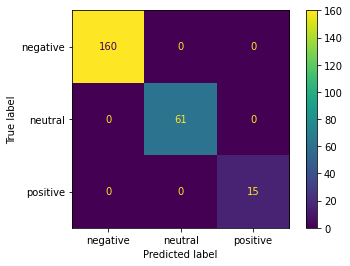

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

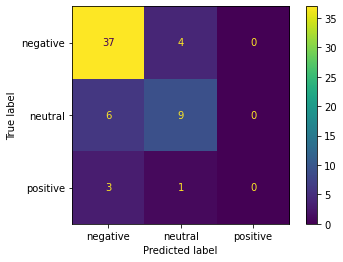

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [34]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.80434783 0.64285714 0.        ]
Recall: [0.90243902 0.6        0.        ]
F1: [0.85057471 0.62068966 0.        ]


C:\Users\JCristancho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### How interpret the results?

### Analyzing errors Bag of Words

In [35]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [36]:
error_df.shape

(60, 3)

In [37]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(20)

,full_text,actual,predicted
3,"El Consejo Nacional Electoral @CNE_COLOMBIA envió concepto jurídico al Tribunal de Cundinamarca en el que pide que no se suspenda al registrador Alexander Vega. \n \n Según el organismo electoral, las elecciones legislativas cumplieron con todas las garantías de transparencia.",neutral,negative
17,"El Liverpool del colombiano Luis Diáz disputará la final de la Champions League el 28 de mayo, justo un día antes de las elecciones en Colombia. https://t.co/zpfUPNuImf",positive,negative
18,"Episodio 8 - En este nuevo episodio Alicia Eugenia Silva nos plantea una reflexión, en estas elecciones ¿el país sigue polarizado? o ¿nace un nuevo bipartidismo en Colombia? https://t.co/HYnK26DpNn via @YouTube",neutral,negative
22,Procuraduría alerta que 2.925 jurados de votación están inhabilitados para elecciones Colombia via @ElColombiano https://t.co/lCdwAtuKoM,negative,neutral
27,AMÉRICA LATINA\n Golpe al uribismo y avance de la izquierda\n a semanas de las elecciones en Colombia - \n https://t.co/DsJ3kKO3b6,positive,negative
32,#Elecciones2022\n En Comité de Seguimiento Electoral de cara a las elecciones del 29 de mayo nuevas conclusiones y peticiones. @MagdalenaGober\n @SantaMartaDTCH\n @Registraduria\n @CNE_COLOMBIA\n 👇\n “La Democracia es un compromiso de todos”: @rmontoyai Infante https://t.co/f3XcwEB599,neutral,negative
34,#Marbelle tendría pensado irse de Colombia si #GustavoPetro gana las elecciones presidenciales\n \n #EsTrending \n \n https://t.co/ICfHo1us76,neutral,negative
35,"https://t.co/KXwMVRujE7 recomendado, votemos a conciencia. Este app que saco @elespectador le ayuda a ver como sus posiciones se alinean con su candidato. 1/3 #eleccionescolombia2022 #elecciones #colombia",neutral,negative
41,@JulianFMartinez @DNP_Colombia @aleboterob Estaban esperando el momento preciso. Las elecciones.,neutral,negative
47,Mi match electoral no puede ser más cierto 😂🥰 @sergio_fajardo ¡vamos con toda! 💚 #MatchElectoral \n \n Para conocer quién sería su match más acorde a sus posturas económicas y sociales para la presidencia: https://t.co/Hb5yhh8elH y mandan fotico a ver que les sale 🤩🧐 https://t.co/NG4X9fRwCa,positive,neutral


# Analyzing errors TF-IDF

In [38]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_tfidf_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [39]:
error_df.shape

(60, 3)

In [40]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(20)

,full_text,actual,predicted
3,"El Consejo Nacional Electoral @CNE_COLOMBIA envió concepto jurídico al Tribunal de Cundinamarca en el que pide que no se suspenda al registrador Alexander Vega. \n \n Según el organismo electoral, las elecciones legislativas cumplieron con todas las garantías de transparencia.",neutral,negative
8,"#Colombia #Petro anuncia que reanudará las relaciones con Venezuela. Colombianos si queréis que el salario mínimo de Colombia baje a los 2 dólares al mes como en Venezuela, por debajo del umbral de pobreza (1,75 dólares/día) vuestro candidato es #Petro.\n https://t.co/LpgzfWPvN7",negative,neutral
17,"El Liverpool del colombiano Luis Diáz disputará la final de la Champions League el 28 de mayo, justo un día antes de las elecciones en Colombia. https://t.co/zpfUPNuImf",positive,negative
18,"Episodio 8 - En este nuevo episodio Alicia Eugenia Silva nos plantea una reflexión, en estas elecciones ¿el país sigue polarizado? o ¿nace un nuevo bipartidismo en Colombia? https://t.co/HYnK26DpNn via @YouTube",neutral,negative
22,Procuraduría alerta que 2.925 jurados de votación están inhabilitados para elecciones Colombia via @ElColombiano https://t.co/lCdwAtuKoM,negative,neutral
27,AMÉRICA LATINA\n Golpe al uribismo y avance de la izquierda\n a semanas de las elecciones en Colombia - \n https://t.co/DsJ3kKO3b6,positive,negative
34,#Marbelle tendría pensado irse de Colombia si #GustavoPetro gana las elecciones presidenciales\n \n #EsTrending \n \n https://t.co/ICfHo1us76,neutral,negative
35,"https://t.co/KXwMVRujE7 recomendado, votemos a conciencia. Este app que saco @elespectador le ayuda a ver como sus posiciones se alinean con su candidato. 1/3 #eleccionescolombia2022 #elecciones #colombia",neutral,negative
41,@JulianFMartinez @DNP_Colombia @aleboterob Estaban esperando el momento preciso. Las elecciones.,neutral,negative
47,Mi match electoral no puede ser más cierto 😂🥰 @sergio_fajardo ¡vamos con toda! 💚 #MatchElectoral \n \n Para conocer quién sería su match más acorde a sus posturas económicas y sociales para la presidencia: https://t.co/Hb5yhh8elH y mandan fotico a ver que les sale 🤩🧐 https://t.co/NG4X9fRwCa,positive,neutral
